Classes for state representation in multiagent MDP with Nash games

MC(states, transitions) -> Markov Chain
A Markov Chain is composed by a set of states and a set of transitions
    states is a list of State objects
    transitions is a dictionary where the keys are the states and the values are dictionaries
    where the keys are the actions and the values are the couples (next_state, probability)

e.g. transitions = {state_1: {action_1: (state_2, prob_1.2), action_2: (state_3, prob_1.3)}, state_2: {action_1: (state_3, prob_2.3), action_3: (state_2, prob_2.2)}, ...}

In [11]:
class MC:   
    def __init__(self, states, transitions):
        self.states = states
        self.transitions = transitions

    def possible_actions(self, state):
        return self.transitions[state].keys()
    
    def get_states(self):
        return self.states

State(name, reward) -> State
every state of the Markov's chain is composed by a Nash game
    name is the name of the state
    reward is a dictionary where the keys are the tuples expressing the combination of actions 
    of the game and the values are the tuples expressing the reward for each player

e.g. reward = {(action_1.a, action_1.b): {(reward_a, reward_b)}, (action_2.a, action): {(reward_a, reward_b)}, ...}

In [12]:
class State:

    def __init__(self, name, reward):
        self.name = name
        self.reward = reward
    
    def nashEquilibrium():
        "to be completed"
        pass

Graph representation for the state space using NetworkX library (https://networkx.org/documentation/stable/index.html)

In [13]:
import networkx as nx

For each state, we create an edge from the state to each state reached by one of the actions aviable in the initial state.
The nodes are created automatically.
Then the edge is given two attributes: the action that allows the transition from the first to the second state, accessible by the key 'action', and the probability of the transition, with keyword 'probability'
The state object used as node already contains the name of the state and its reward, so it doesn't need any attribute

In [14]:
state_1 = State("1", 0.5)
state_2 = State("2", 0.9)
state_3 = State("3", -1)
states = [state_1, state_2, state_3]
actions = ["action_1", "action_2", "action_3"]
transitions = {state_1: {actions[0]: (state_2, 0.7), actions[1]: (state_3, 0.9)}, state_2: {actions[0]: (state_3, 1), actions[2]: (state_2, 0.3)}, state_3: {actions[1]: (state_1, 0.9), actions[2]: (state_2, 0.5)}}
M = MC(states, transitions)

In [15]:
G = nx.DiGraph()

for s in M.get_states():
    for a in transitions[s]:
        s_next = transitions[s][a][0]
        G.add_edge(s.name, s_next.name)
        G.edges[s.name, s_next.name]['action'] = a

Plotting the graph

In [16]:
import matplotlib.pyplot as plt

In [17]:
print(nx.adjacency_matrix(G))

  (0, 1)	1
  (0, 2)	1
  (1, 1)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1


Note: "with_labels=True" prints on the node the toString() value of the node. Knowing this, the state need to be inserted in the graph with their name and not with their State object

In [18]:
G.edges()

OutEdgeView([('1', '2'), ('1', '3'), ('2', '3'), ('2', '2'), ('3', '1'), ('3', '2')])

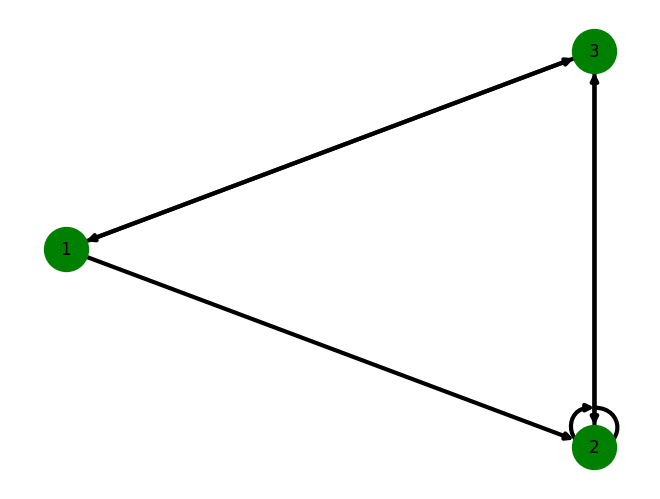

In [20]:
options = {'node_color': 'green', 'node_size': 1000, 'width': 3}
nx.draw_shell(G, **options, with_labels=True)
#nx.draw(G, pos **options, labels = {node: node.name for node in G.nodes()})
plt.show()